# HSE 2022: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [96]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [97]:
def find_product(a, r, N):
    arr_product = [a]
    while len(arr_product) < N:
        arr_product.append(arr_product[len(arr_product) - 1] * r)
    return arr_product


a = 2
r = 3
N = 3
print(find_product(a, r, N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [98]:
def check_palindrome(num):
    temp = num
    check = 0
    while temp > 0:
        current_num = temp % 10
        check = check * 10 + current_num
        temp //= 10
    return num == check


for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [99]:
def find_palindromes(N):
    palindromes = []
    current_num = 1000
    while len(palindromes) < N:
        if check_palindrome(current_num):
            palindromes.append(current_num)
        current_num += 1
    return palindromes


print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [100]:
from random import randint


def find_min(a, b, c):
    if a < b:
        min_ = a
    else:
        min_ = b

    if c < min_:
        min_ = c

    return min_


for i in range(10):
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-60 -75 -20 	Minimum: -75
34 63 -51 	Minimum: -51
69 -15 -84 	Minimum: -84
17 64 -5 	Minimum: -5
95 37 -71 	Minimum: -71
87 40 35 	Minimum: 35
12 63 22 	Minimum: 12
26 -16 4 	Minimum: -16
-27 -41 25 	Minimum: -41
62 86 -16 	Minimum: -16


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [101]:
np.random.seed(42)
my_array = np.random.rand(17)
my_array /= (np.sum(my_array) / 6)
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [102]:
def calculate_manhattan(a, b):
    distance = np.sum(np.abs(a - b))
    return distance


def calculate_euclidean(a, b):
    distance = np.sqrt(np.sum(np.square(a - b)))
    return distance


def calculate_chebyshev(a, b):
    distance = np.max(np.abs(a - b))
    return distance


def calculate_cosine(a, b):
    distance = 1 - (np.dot(a, b) / (np.sqrt(np.sum(np.square(a))) * np.sqrt(np.sum(np.square(b)))))
    return distance

In [103]:
np.random.seed(42)
a = np.random.randint(10, size=10)
b = np.random.randint(10, size=10)

print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 22
Euclidean distance: 8.366600265340756
Chebyshev distance: 5
Cosine distance: 0.1095088267154255


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [104]:
def transform(array):
    transformed_array = np.arange(start=-4, stop=0)
    transformed_array = np.tile(transformed_array, 76 // np.size(transformed_array))
    return transformed_array

In [105]:
my_array = np.random.randint(10, size=76)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4
Max: -1
Array:
[-4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1
 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1
 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1
 -4 -3 -2 -1]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [106]:
my_array = np.random.randint(low=-7, high=44, size=(8, 5))
column_index = np.where(my_array == my_array.max())[1]
selected_column = my_array[:, column_index]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column(s): \n{selected_column}')

Shape:  (8, 5)
Array:
[[33 20 -1  1  0]
 [ 4 26 25 40 15]
 [16 29 27 36 32]
 [14 19 27 -7 27]
 [29 39  6 -5 -7]
 [-3 18  6 31 19]
 [ 1  7  7 18 34]
 [ 5 43 24 31 41]]
Selected column(s): 
[[20]
 [26]
 [29]
 [19]
 [39]
 [18]
 [ 7]
 [43]]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [107]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.31435598        nan 0.90756647 0.24929223        nan 0.75555114
 0.22879817 0.07697991        nan        nan]


In [108]:
def replace_missing(arr):
    array_without_missing = arr
    array_without_missing[np.where(np.isnan(arr))] = np.nanmedian(arr)
    return array_without_missing

In [109]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.31435598 0.28182411 0.90756647 0.24929223 0.28182411 0.75555114
 0.22879817 0.07697991 0.28182411 0.28182411]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [110]:
def mean_channel(X):
    mean_vector = np.mean(X, axis=(0, 1))
    return mean_vector

In [111]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-1.64988558 -2.3180778  -2.47368421]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [112]:
def get_unique_rows(X):
    X_unique = np.unique(X, axis = 1)
    return X_unique

In [113]:
X = np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique rows:')
get_unique_rows(X)

Matrix:
[[[5 5 4]
  [4 4 5]
  [5 4 5]]

 [[5 5 4]
  [5 5 4]
  [4 5 5]]

 [[4 4 5]
  [5 5 5]
  [4 5 5]]

 [[4 5 4]
  [5 5 4]
  [4 5 5]]

 [[5 4 5]
  [4 4 5]
  [4 5 5]]

 [[5 5 5]
  [4 4 5]
  [5 4 4]]

 [[4 4 5]
  [5 4 5]
  [4 5 4]]

 [[5 4 4]
  [5 4 5]
  [5 4 5]]

 [[5 5 5]
  [5 4 5]
  [5 5 5]]

 [[5 4 5]
  [4 4 4]
  [4 5 4]]

 [[4 5 5]
  [5 4 5]
  [5 4 5]]

 [[5 5 5]
  [4 5 5]
  [4 5 4]]

 [[5 4 4]
  [4 4 5]
  [4 5 4]]

 [[4 4 5]
  [4 5 5]
  [5 5 5]]

 [[5 5 5]
  [5 4 4]
  [4 4 4]]

 [[5 5 5]
  [5 5 5]
  [5 4 4]]

 [[4 4 5]
  [5 5 4]
  [5 5 5]]

 [[4 5 4]
  [4 4 4]
  [5 4 4]]

 [[5 5 4]
  [5 4 4]
  [4 4 5]]]
Unique rows:


array([[[4, 4, 5],
        [5, 4, 5],
        [5, 5, 4]],

       [[5, 5, 4],
        [4, 5, 5],
        [5, 5, 4]],

       [[5, 5, 5],
        [4, 5, 5],
        [4, 4, 5]],

       [[5, 5, 4],
        [4, 5, 5],
        [4, 5, 4]],

       [[4, 4, 5],
        [4, 5, 5],
        [5, 4, 5]],

       [[4, 4, 5],
        [5, 4, 4],
        [5, 5, 5]],

       [[5, 4, 5],
        [4, 5, 4],
        [4, 4, 5]],

       [[5, 4, 5],
        [5, 4, 5],
        [5, 4, 4]],

       [[5, 4, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[4, 4, 4],
        [4, 5, 4],
        [5, 4, 5]],

       [[5, 4, 5],
        [5, 4, 5],
        [4, 5, 5]],

       [[4, 5, 5],
        [4, 5, 4],
        [5, 5, 5]],

       [[4, 4, 5],
        [4, 5, 4],
        [5, 4, 4]],

       [[4, 5, 5],
        [5, 5, 5],
        [4, 4, 5]],

       [[5, 4, 4],
        [4, 4, 4],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 4, 4],
        [5, 5, 5]],

       [[5, 5, 4],
        [5, 5, 5],
        [4, 4, 5]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [114]:
dataset = pd.read_csv('titanic.csv')
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [115]:
#1 Are there any missing values? In what columns?
print(f'Columns with missing values: {dataset.columns[dataset.isna().any()].tolist()}\n')

Columns with missing values: ['Age', 'Cabin', 'Embarked']



In [116]:
#2 What is the percentage of survived passengers? Are the classes balanced?
print('Percentage of survived(1) and died(0)')
print(dataset['Survived'].value_counts(normalize=True) * 100)

Percentage of survived(1) and died(0)
0    61.616162
1    38.383838
Name: Survived, dtype: float64


Так как процентное соотношение классов примерно 62% и 38%, можно сказать, что классы не сбалансированы, но не критически.

In [117]:
#3 Were there more males or females?
print('There were more: ')
print(dataset['Sex'].value_counts().idxmax())

There were more: 
male


In [118]:
#4 What was the least popular port of embarkation?
print('Least popular port of embarkation:')
print(dataset['Embarked'].value_counts().idxmin())

Least popular port of embarkation:
Q


In [119]:
#5 How many classes (pclass) were there on Tinanic?
print('Classes types number:')
print(dataset['Pclass'].value_counts().size)

Classes types number:
3


In [120]:
#6 What is the overall average ticket fare? And for every class?
print('Overall average ticket fare:')
print(dataset['Fare'].mean())
print('Class 1 Average ticket fare:')
print(dataset.loc[dataset['Pclass'] == 1, 'Fare'].mean())
print('Class 2 Average ticket fare:')
print(dataset.loc[dataset['Pclass'] == 2, 'Fare'].mean())
print('Class 3 Average ticket fare:')
print(dataset.loc[dataset['Pclass'] == 3, 'Fare'].mean())

Overall average ticket fare:
32.2042079685746
Class 1 Average ticket fare:
84.15468749999992
Class 2 Average ticket fare:
20.66218315217391
Class 3 Average ticket fare:
13.675550101832997


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

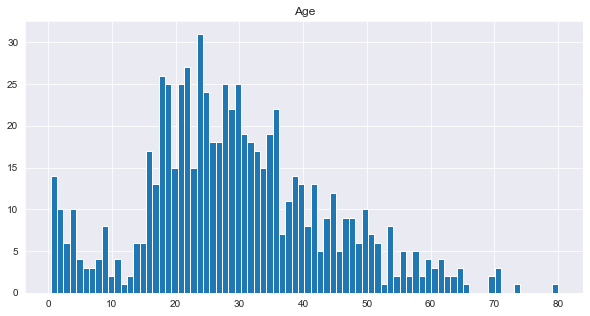

In [121]:
# What is the minimal and maximum ages of the passengers? Visualize it on the plot
plt.figure(1, figsize=(10,5))
plt.hist(dataset['Age'], bins = 80)
plt.title('Age')
plt.show()

In [122]:
print('Min age: ', dataset['Age'].min())

Min age:  0.42


На графике видно, что минимальный возраст чуть больше 0 лет. Максимальный возраст - 80.

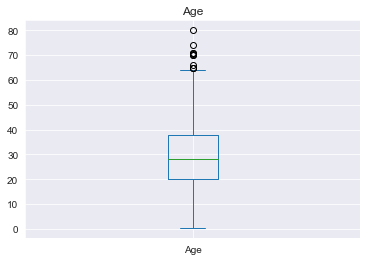

Mean age:  29.69911764705882


In [123]:
# What is the mean age?
dataset['Age'].plot(kind='box', title='Age')
plt.show()
print('Mean age: ', dataset['Age'].mean())

На графике видно, что средний возраст около 28-29 лет.

The mean age female:  27.915708812260537
The mean age male:  30.72664459161148


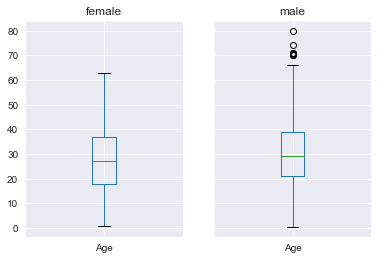

In [124]:
# And among males and females sepatately? Visualize it on the plot
print('The mean age female: ', dataset['Age'].where(dataset['Sex'] == 'female').mean())
print('The mean age male: ', dataset['Age'].where(dataset['Sex'] == 'male').mean())
dataset.groupby("Sex").boxplot(column = "Age")
plt.show()

На графиках видны примерные средние возроста для мужчин и для женщин.

Вывод: на корабле преимущественно были люди в возрасте от 15 до 35, так же довольно много маленьких детей. Мин. возраст - меньше года, макс. - 80 лет. Очень мало людей старше 65 (выбросы на boxplot). Средний возраст мужчин больше среднего возраста женщин. У мужчин больше возрастных аномальных выбросов, чем у женщин.

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [125]:
def get_title(string):
    before_dot, after_dot = string.split(".", 1)
    return before_dot.split()[-1]

In [126]:
# How many are there unique titles?
unique = dataset['Name'].apply(get_title)
print('Number of unique titles: ', unique.nunique())

Number of unique titles:  17


In [127]:
# How many are there passengers with every title?
print('Titles:')
print(unique.value_counts())

Titles:
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64


In [128]:
# What is the most popular man's title? And woman's title?
print('Most popular male title:', unique[dataset['Sex'] == 'male'].value_counts().idxmax())
print('Most popular female title:', unique[dataset['Sex'] == 'female'].value_counts().idxmax())

Most popular male title: Mr
Most popular female title: Miss


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



In [129]:
# Is there correlation between pclass and ticket price?
print('Price-class correlation:', dataset['Pclass'].corr(dataset['Fare']))

Price-class correlation: -0.5494996199439077


In [130]:
# Calculate mean price for each class and visualize price distribution for each class.
print('Ticket price mean for each class: ')
print(dataset.groupby("Pclass")['Fare'].mean())

Ticket price mean for each class: 
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


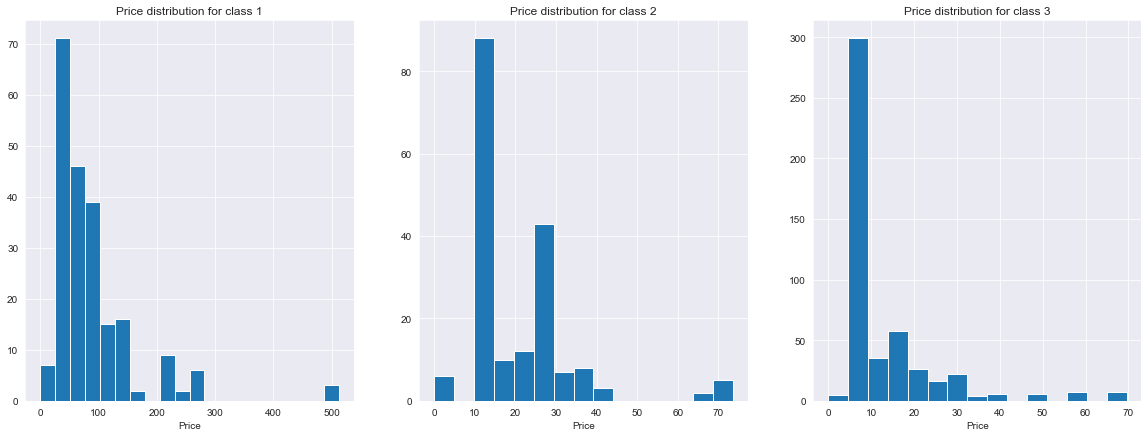

In [131]:
plt.figure(1, figsize=(20,7))
mask = dataset['Pclass'] == 1
tmp = dataset[mask]
plt.subplot(131)
plt.hist(tmp['Fare'], bins=20)
plt.title('Price distribution for class 1')
plt.xlabel('Price')

mask = dataset['Pclass'] == 2
tmp = dataset[mask]
plt.subplot(132)
plt.hist(tmp['Fare'], bins=15)
plt.title('Price distribution for class 2')
plt.xlabel('Price')

mask = dataset['Pclass'] == 3
tmp = dataset[mask]
plt.subplot(133)
plt.hist(tmp['Fare'], bins=15)
plt.title('Price distribution for class 3')
plt.xlabel('Price')

plt.show()

Выводы: отрицательная корреляция показывает, что чем выше число, указывающее на класс, тем меньше стоит билет.
Так же на графиках видно, что цены для 1 класса в основном варьируются до 300, но есть выбросы в большую сторону.
Никто из пассажиров 2 и 3 классов не заплатил больше 80 долларов.
В каждом классе есть ценовые выбросы.


**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [132]:
# Is there correlation between port and ticket price?
dataset['Embarked_category'] = dataset['Embarked'].astype('category').cat.codes
print('Price-port correlation:', dataset['Embarked_category'].corr(dataset['Fare']))

Price-port correlation: -0.23036457312463027


In [133]:
# Calculate mean price for each port and visualize price distribution for each port.
print('Ticket price mean for each port: ')
print(dataset.groupby("Embarked")['Fare'].mean())

Ticket price mean for each port: 
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


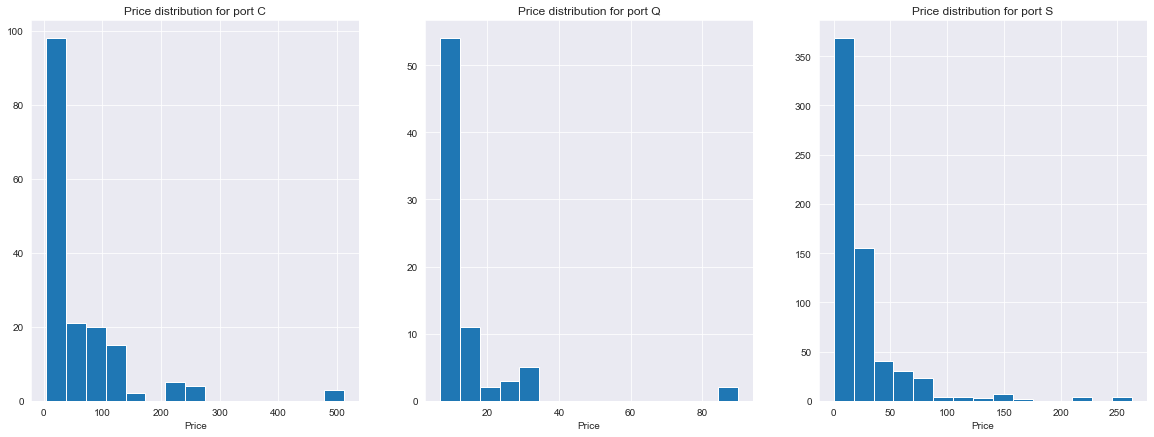

In [134]:
plt.figure(1, figsize=(20,7))
mask = dataset['Embarked'] == 'C'
tmp = dataset[mask]
plt.subplot(131)
plt.hist(tmp['Fare'], bins=15)
plt.title('Price distribution for port C')
plt.xlabel('Price')

mask = dataset['Embarked'] == 'Q'
tmp = dataset[mask]
plt.subplot(132)
plt.hist(tmp['Fare'], bins=15)
plt.title('Price distribution for port Q')
plt.xlabel('Price')

mask = dataset['Embarked'] == 'S'
tmp = dataset[mask]
plt.subplot(133)
plt.hist(tmp['Fare'], bins=15)
plt.title('Price distribution for port S')
plt.xlabel('Price')

plt.show()

Выводы: самые дорогие билеты с отправлением из порта C. Порт Q - с самыми дешевыми билетами.
В порту Q есть выбросы, отличающиеся от основыных значений примерно в 3 раза.
В каждом порту были ценовые выбросы, больше всего в порту S.

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

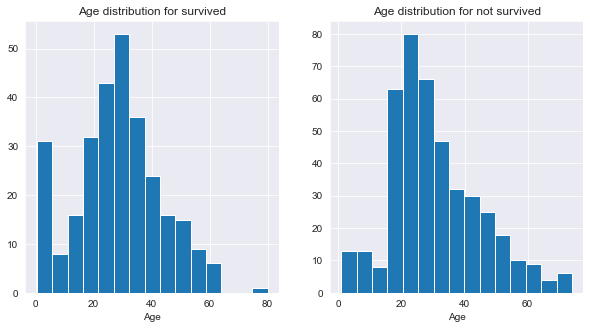

In [135]:
plt.figure(1, figsize=(10,5))
mask_survived = dataset['Survived'] == 1
tmp_survived = dataset[mask_survived]
survived_mean = tmp_survived['Age'].mean()

plt.subplot(121)
plt.hist(tmp_survived['Age'], bins=15)
plt.title('Age distribution for survived')
plt.xlabel('Age')

mask_not_survived = dataset['Survived'] == 0
tmp_not_survived = dataset[mask_not_survived]
dead_mean = tmp_not_survived['Age'].mean()

plt.subplot(122)
plt.hist(tmp_not_survived['Age'], bins=15)
plt.title('Age distribution for not survived')
plt.xlabel('Age')

plt.show()

In [136]:
print(f'Means: for survived = {survived_mean}, for not survived = {dead_mean}')

Means: for survived = 28.343689655172415, for not survived = 30.62617924528302


Средние возраста выживших и погибших не равны, но их значения очень близки друг к другу.
Большинство выживших - в возрасте от 20 до 30, так же много выживших детей.
Большинство погибших - в возрасте от 15 до 35, в числе погибших мало детей.

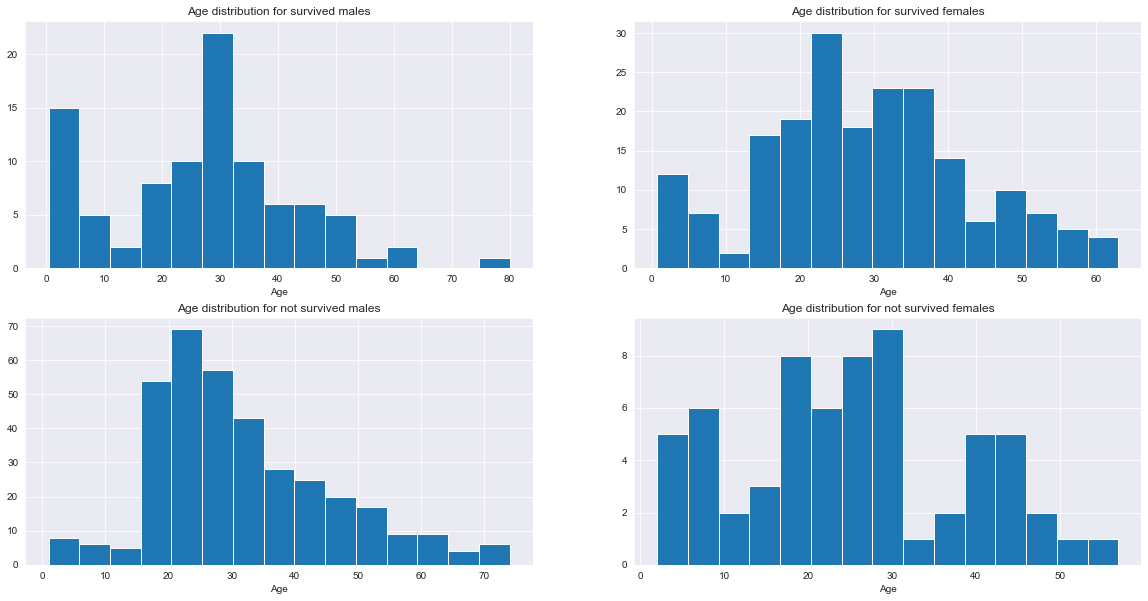

In [137]:
plt.figure(1, figsize=(20,10))
# male survived
mask_male = tmp_survived['Sex'] == 'male'
tmp_male = tmp_survived[mask_male]
male_mean_surv = tmp_male['Age'].mean()

plt.subplot(221)
plt.hist(tmp_male['Age'], bins=15)
plt.title('Age distribution for survived males')
plt.xlabel('Age')

# female survived
mask_female = tmp_survived['Sex'] == 'female'
tmp_female = tmp_survived[mask_female]
female_mean_surv = tmp_male['Age'].mean()

plt.subplot(222)
plt.hist(tmp_female['Age'], bins=15)
plt.title('Age distribution for survived females')
plt.xlabel('Age')

# male not survived
mask_male = tmp_not_survived['Sex'] == 'male'
tmp_male = tmp_not_survived[mask_male]
male_mean_not_surv = tmp_male['Age'].mean()

plt.subplot(223)
plt.hist(tmp_male['Age'], bins=15)
plt.title('Age distribution for not survived males')
plt.xlabel('Age')

# female not survived
mask_female = tmp_not_survived['Sex'] == 'female'
tmp_female = tmp_not_survived[mask_female]
female_mean_not_surv = tmp_female['Age'].mean()

plt.subplot(224)
plt.hist(tmp_female['Age'], bins=15)
plt.title('Age distribution for not survived females')
plt.xlabel('Age')

plt.show()

In [138]:
print(f'Means for survived: for males = {male_mean_surv}, for females = {female_mean_surv}')
print(f'Means for not survived: for males = {male_mean_not_surv}, for females = {female_mean_not_surv}')

Means for survived: for males = 27.276021505376345, for females = 27.276021505376345
Means for not survived: for males = 31.618055555555557, for females = 25.046875


Вывод: кол-во погибших женщин, в сравнении с мужчинами, не очень велико.
Кол-во выживших мужчин больше всего в детском и среднем возрасте около 30 лет.
Есть выбросы в возрасте выживших мужчин.
Возраст, с которого кол-во невыживших мужчин резко возрастает - 15 лет.